In [80]:
# import pygmt #Not working
import geopandas as gpd
import matplotlib.pyplot as plt
#surpress version warnings
import warnings
warnings.filterwarnings('ignore')
import contextily as cx
import pandas as pd
import plotly.express
import chart_studio.plotly as py #New version added for plotly. NH.
import plotly.graph_objs as go #imports for go.figure()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns

init_notebook_mode(connected=True) 

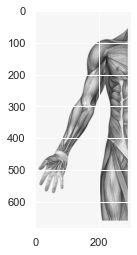

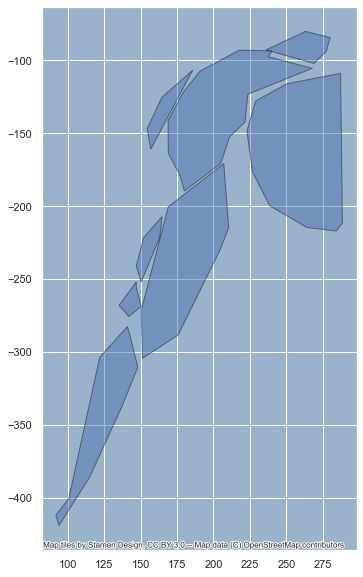

In [81]:
'''
    Plotting in one go with overlay, not working contextily uses geographical map...not the map you have
'''

# import pygmt #Not working
import geopandas
import matplotlib.pyplot as plt
#surpress version warnings
import warnings
warnings.filterwarnings('ignore')
import contextily as cx

I = plt.imread("greyed muscle image.tif")
plt.imshow(I)

df = geopandas.read_file('Anatomy Shape Edges.shp')
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df.crs
# df_wm = df.to_crs(epsg=3857)
# ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

In [82]:
"""
    Get muscle frequency
"""


df_mp = pd.read_csv(r'Data\MyoCI-Age_StrokeLocation_Other_Measures.csv')
df_mp = df_mp[['MP1','MP2','MP3']]
df_mp['MP1'] = df_mp['MP1'].str.lower()
df_mp['MP2'] = df_mp['MP2'].str.lower()
df_mp['MP3'] = df_mp['MP3'].str.lower()
print(df_mp.head())


         MP1     MP2        MP3
0      ad/pd   bi/ad  trilat/pd
1      bi/ad   ad/pd  trilat/pd
2  trilat/pd   ad/pd  bi/trilat
3      bi/ad  ad/trp  trilat/br
4      bi/ad  trp/ad      ad/pd


In [83]:
mp_num_list = ['MP1','MP2','MP3']
mp_name_list = ['bi','trilat','trilong','ad','pd','pec','br','trp']
mp_dict = {'bi':0,'trilat':0,'trilong':0,'ad':0,'pd':0,'pec':0,'br':0,'trp':0}

for mp_num in mp_num_list:
    for mp_name in mp_name_list:
        tot_count = df_mp[mp_num].str.contains(mp_name).sum()
        mp_dict[mp_name] = mp_dict[mp_name] + tot_count
mp_dict

{'bi': 41,
 'trilat': 16,
 'trilong': 0,
 'ad': 67,
 'pd': 29,
 'pec': 0,
 'br': 9,
 'trp': 23}

In [84]:
# gdf = gpd.read_file('Anatomy Shape.shp')
gdf = gpd.read_file('Anatomy Shape Edges.shp')


# random_num = [1,2,3,4,5,6,7,8]
# gdf['freq'] = random_num

gdf['freq'] = list(mp_dict.values())


print (gdf)

   id muscle_edg                                           geometry  freq
0   1         Bi  POLYGON ((207.093 -170.899, 210.473 -214.836, ...    41
1   2     TriLat  POLYGON ((164.846 -207.232, 163.156 -221.596, ...    16
2   3    TriLong  POLYGON ((147.102 -252.014, 147.102 -255.394, ...     0
3   4         AD  POLYGON ((240.283 -93.561, 237.537 -97.574, 26...    67
4   5         PD  POLYGON ((185.785 -106.869, 157.057 -160.945, ...    29
5   6        Pec  POLYGON ((287.178 -108.981, 288.445 -211.641, ...     0
6   7         BR  POLYGON ((141.003 -282.616, 143.538 -291.488, ...     9
7   8       Trap  POLYGON ((236.059 -92.927, 263.097 -80.253, 27...    23


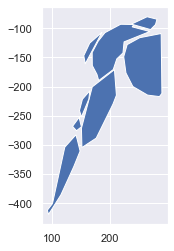

In [85]:
%matplotlib inline
ax = gdf.plot() #Aspect = 1 ignores the negative values and the errors it has...https://stackoverflow.com/questions/63090300/graphing-points-on-a-map-but-the-error-code-is-valueerror-box-aspect-and-fi
plt.show()

<AxesSubplot:>

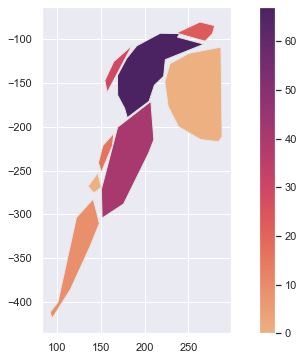

In [87]:
fig, ax = plt.subplots(1,figsize=(10,6))
gdf.plot(column='freq', cmap='flare', linewidth=1, ax=ax, edgecolor='0.9', legend = True)

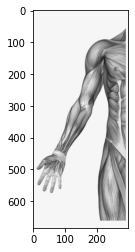

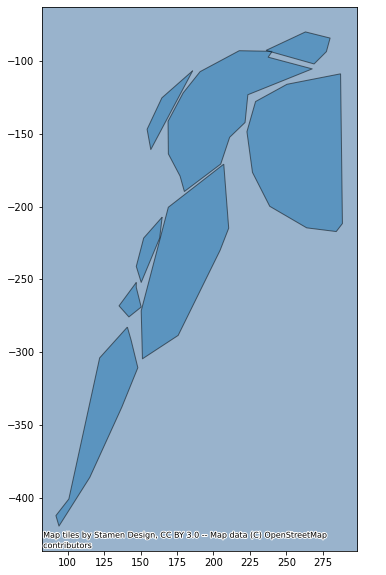

In [21]:
'''
    Plotting in one go with overlay, not working contextily uses geographical map...not the map you have
'''

# import pygmt #Not working
import geopandas
import matplotlib.pyplot as plt
#surpress version warnings
import warnings
warnings.filterwarnings('ignore')
import contextily as cx

I = plt.imread("greyed muscle image.tif")
plt.imshow(I)

df = geopandas.read_file('Anatomy Shape Edges.shp')
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df.crs
# df_wm = df.to_crs(epsg=3857)
# ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

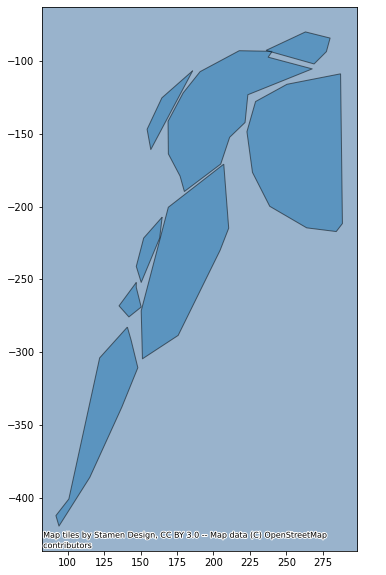

In [18]:
df_wm = df.to_crs(epsg=4326)

ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

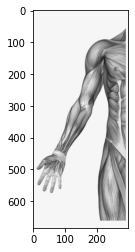

In [17]:
# I = plt.imread("greyed muscle image.tif")
# plt.imshow(I)

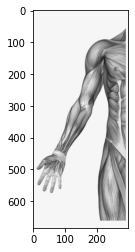

In [29]:
# import matplotlib.pyplot as plt
# img = plt.imread("greyed muscle image.tif")
# fig, ax = plt.subplots()
# ax.imshow(img)

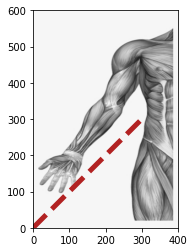

In [28]:
# fig, ax = plt.subplots()
# x = range(300)
# ax.imshow(img, extent=[0, 400, 0, 600])
# ax.plot(x, x, '--', linewidth=5, color='firebrick')

In [88]:
"""
    Analysis part with spread sheet - Stroke location and other measures
"""
from openpyxl import load_workbook
# xls = load_workbook(r'Data\MyoCI-Age_StrokeLocation_Other_Measures.xlsx')
# sheet = xls['Sheet1']
# df = pd.DataFrame(sheet.values)
# df.columns = df.iloc[0] #set headers to the firs row of names
# df = df[1:] #set the new row as the starting data
# # df.index += 1
# df

df = pd.read_csv(r'Data\MyoCI-Age_StrokeLocation_Other_Measures.csv')

#Calculate clinical changes
df['WOLF_w6-bl'] = df['WOLF_w6'] - df['WOLF_bl']
df['FMA_w6-bl'] = df['FMA_w6'] - df['FMA_bl']
df.head()

,Subject,Subject_1,Group,Age,Gender,Ethnicity,Race,Stroke Location,Stroke Side,WOLF_bl,WOLF_w6,WOLF_w10,FMA_bl,FMA_w6,FMA_w10,MP1,MP2,MP3,WOLF_w6-bl,FMA_w6-bl
0,CW_01,CW01,2D,67,F,Not Hispanic or Latino,White,NaN,NaN,80.869670,80.71400,80.55267,16.5,14,17.0,AD/PD,Bi/AD,Trilat/PD,-0.155670,-2.5
1,CW_02,CW02,2D,48,M,Not Hispanic or Latino,White,NaN,NaN,80.335000,80.32670,80.33930,23.0,26,27.0,Bi/AD,AD/PD,Trilat/PD,-0.008300,3.0
2,CW_04,CW04,2D,59,M,Not Hispanic or Latino,Black/African American,3,L,69.165000,53.94667,38.11267,28.5,35,26.0,Trilat/PD,AD/PD,Bi/TriLat,-15.218330,6.5
3,CW_07,CW07,2D,58,M,Not Hispanic or Latino,Asian,"1,3",L,88.559000,88.60133,88.73667,22.0,21,25.0,Bi/AD,AD/Trp,TriLat/BR,0.042330,-1.0
4,CW_14,CW14,2D Sham,45,F,Not Hispanic or Latino,Black/African American,"1,3",R,80.539665,66.62067,57.88933,26.5,31,32.0,Bi/AD,Trp/AD,AD/PD,-13.918995,4.5


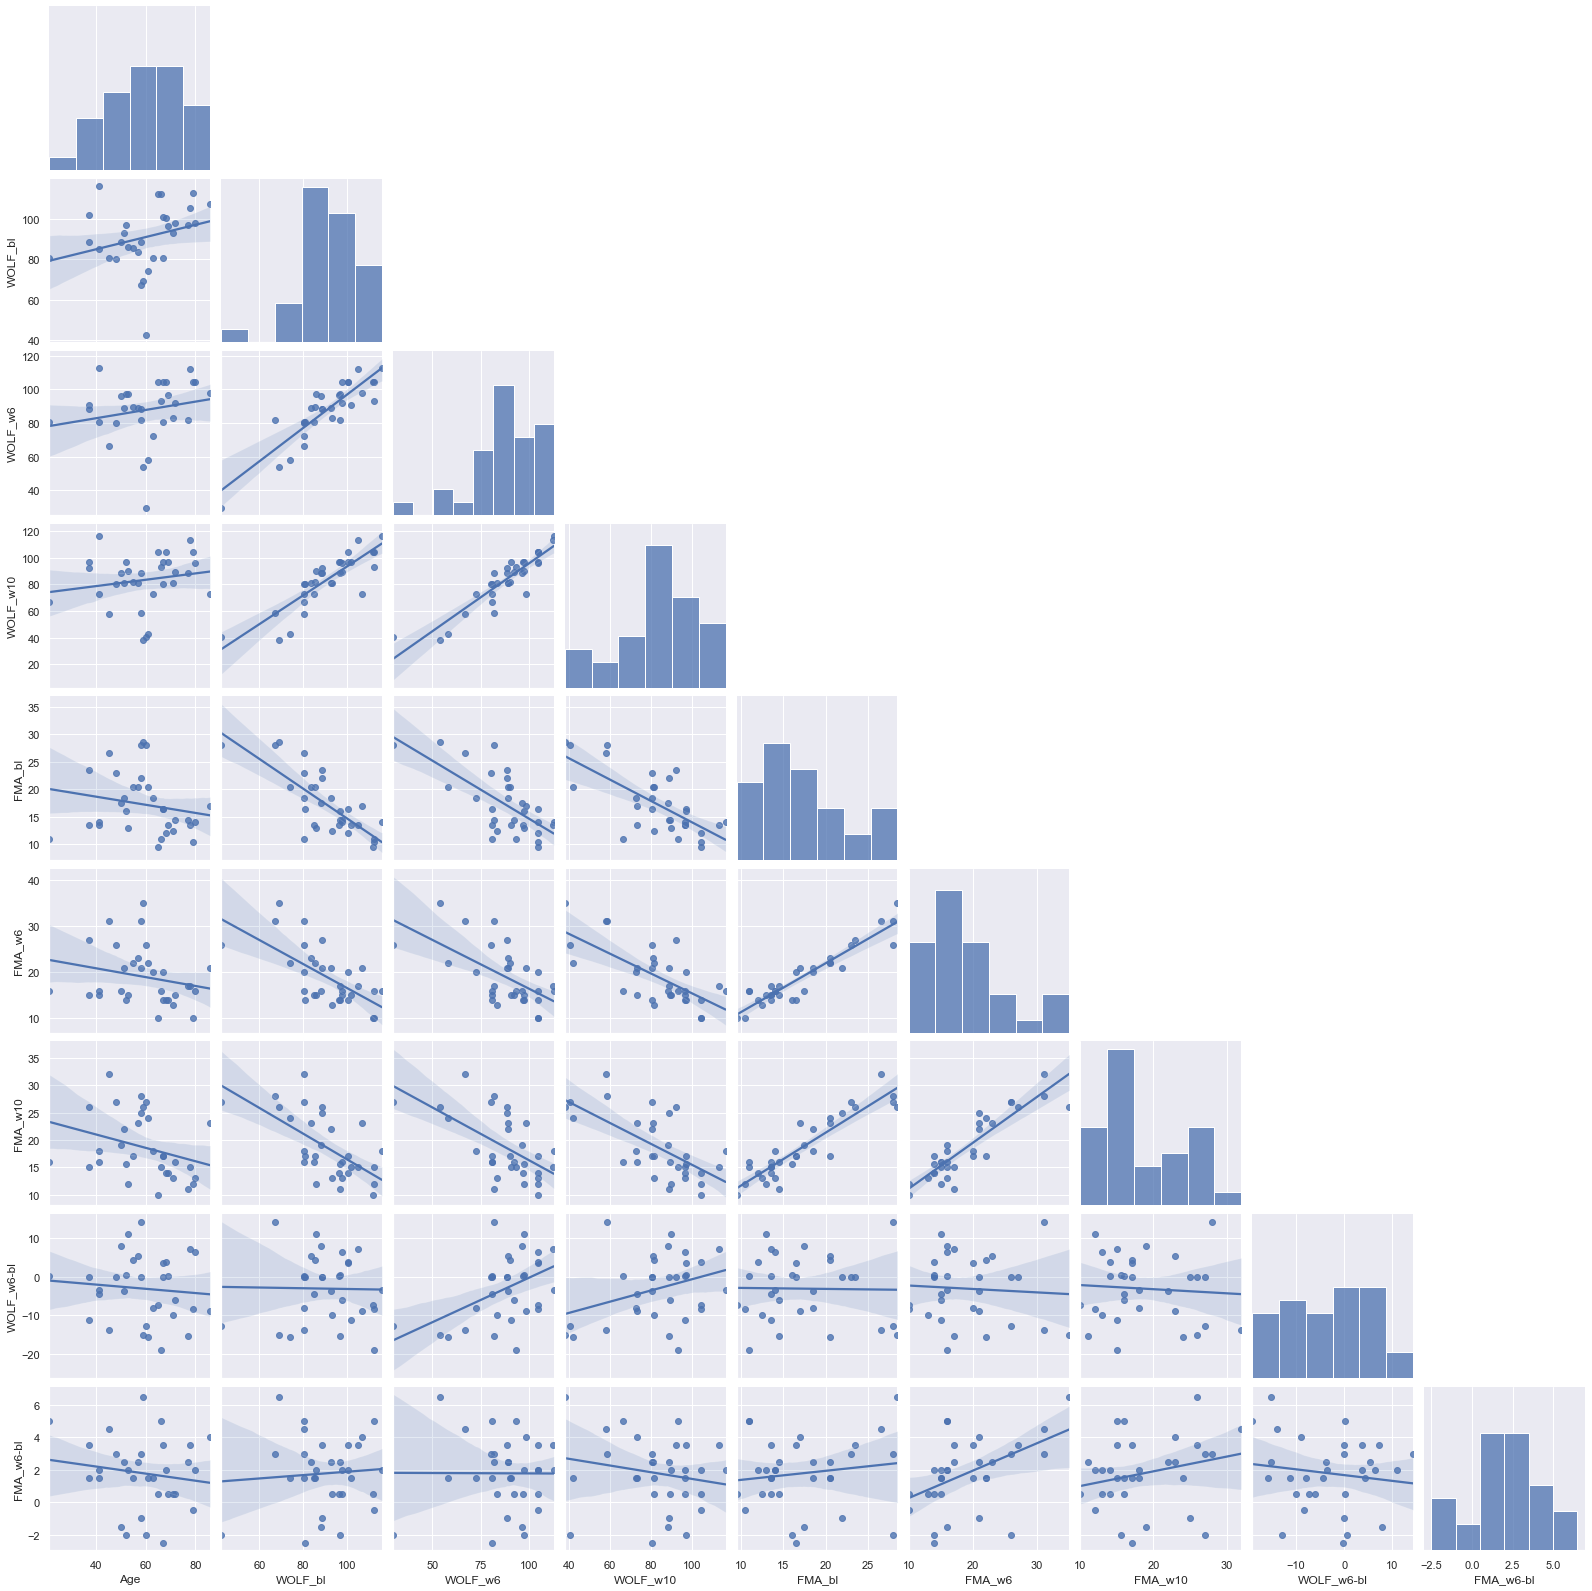

In [90]:
sns.pairplot(df, kind='reg', corner=True)

   Age    WOLF_bl
0   67  80.869670
1   48  80.335000
2   59  69.165000
3   58  88.559000
4   45  80.539665


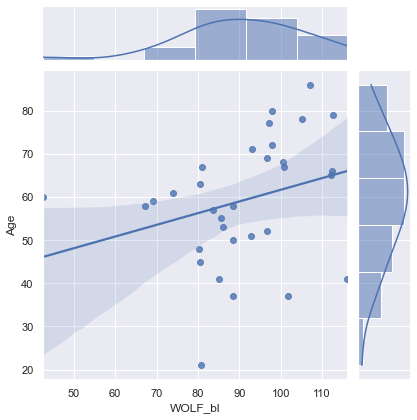

In [6]:
"""
    Does age have an effect on their initial WOLF speed
"""

df_new = df[['Age','WOLF_bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['Age'], kind = 'reg')

   Age  WOLF_w6-bl
0   67   -0.155670
1   48   -0.008300
2   59  -15.218330
3   58    0.042330
4   45  -13.918995


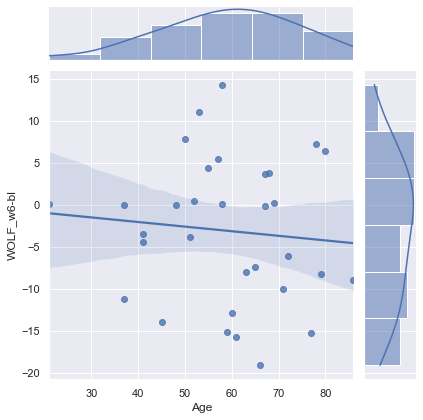

In [10]:
"""
    Does age have an effect on their WOLF improvement
"""

df_new = df[['Age','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['Age'], df_new['WOLF_w6-bl'], kind= 'reg')

     WOLF_bl  WOLF_w6-bl
0  80.869670   -0.155670
1  80.335000   -0.008300
2  69.165000  -15.218330
3  88.559000    0.042330
4  80.539665  -13.918995


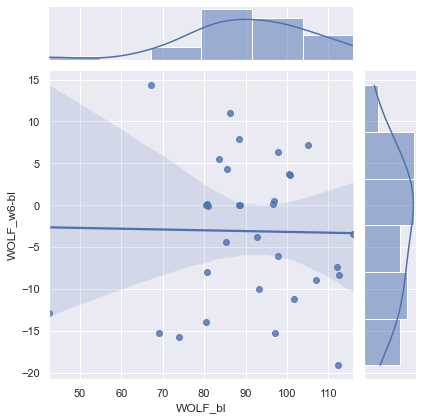

In [11]:
"""
    Does initial WOLF an effect on their WOLF improvement
"""

df_new = df[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')

     WOLF_bl  WOLF_w6-bl
0  80.869670   -0.155670
1  80.335000   -0.008300
2  69.165000  -15.218330
3  88.559000    0.042330
4  80.539665  -13.918995


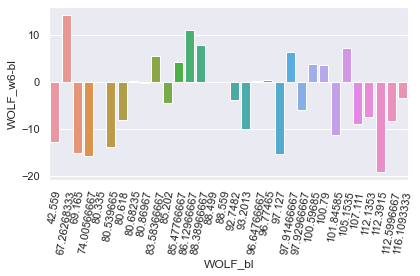

In [49]:
"""
    Does initial WOLF an effect on their WOLF improvement
    Bar plot version
"""
%matplotlib inline
df_new = df[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'])
plt.xticks(rotation=80)
plt.tight_layout()

   Age  FMA_bl
0   67    16.5
1   48    23.0
2   59    28.5
3   58    22.0
4   45    26.5


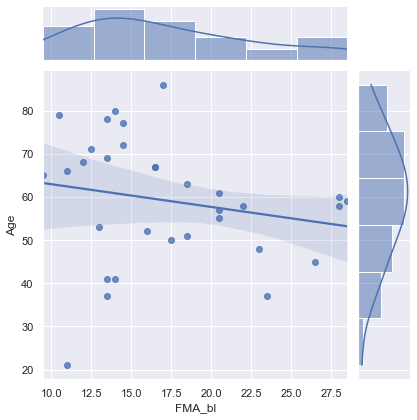

In [8]:
"""
    Does Age have an effect on initial FMA
"""

df_new = df[['Age','FMA_bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['FMA_bl'], df_new['Age'], kind='reg')

   Age  FMA_w6-bl
0   67       -2.5
1   48        3.0
2   59        6.5
3   58       -1.0
4   45        4.5


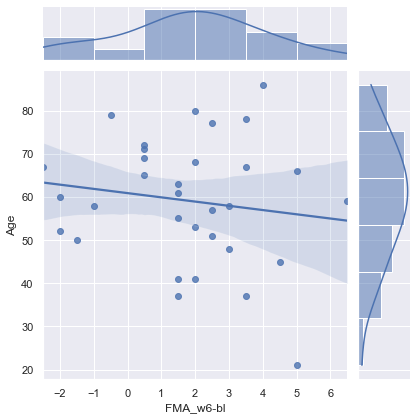

In [36]:
"""
    Does age have an effect on FMA improvement
"""


df_new = df[['Age','FMA_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['FMA_w6-bl'],df_new['Age'],kind = 'reg')

   FMA_bl  FMA_w6-bl
0    16.5       -2.5
1    23.0        3.0
2    28.5        6.5
3    22.0       -1.0
4    26.5        4.5


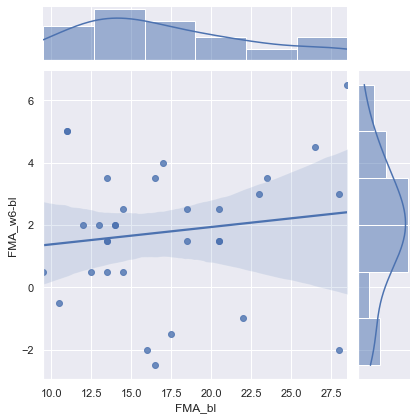

In [51]:
"""
    Does FMA initial have an effect on FMA improvement
"""


df_new = df[['FMA_bl','FMA_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['FMA_bl'],df_new['FMA_w6-bl'],kind = 'reg')

   FMA_bl  WOLF_w6-bl
0    16.5   -0.155670
1    23.0   -0.008300
2    28.5  -15.218330
3    22.0    0.042330
4    26.5  -13.918995


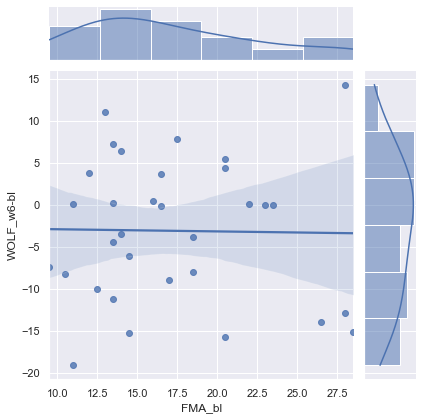

In [52]:
"""
    Does FMA initial have an effect on WOLF improvement
"""


df_new = df[['FMA_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['FMA_bl'],df_new['WOLF_w6-bl'],kind = 'reg')

     WOLF_bl  WOLF_w6-bl
0   80.86967    -0.15567
1   80.33500    -0.00830
2   69.16500   -15.21833
3   88.55900     0.04233
8  112.13530    -7.40830


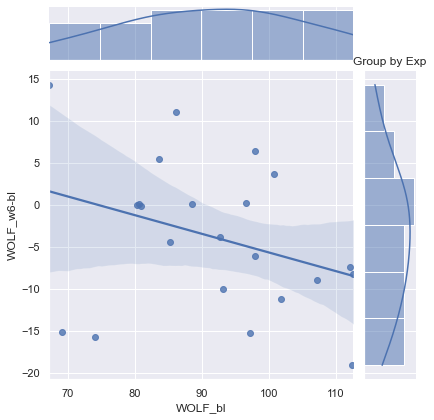

       WOLF_bl  WOLF_w6-bl
4    80.539665  -13.918995
5    88.499000   -0.005670
6    80.618000   -8.048000
7    88.389667    7.877033
10  100.596850    3.760150


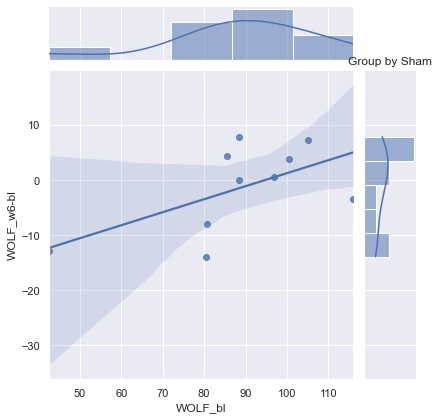

In [91]:
#WOLF
# Group by Exp Only
df_3D = df[(df['Group'] == '3D') | (df['Group'] == '2D') | (df['Group'] =='Reach')]
df_new = df_3D[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')
plt.title('Group by Exp')
plt.show()

# Group by Sham Only
df_3D = df[(df['Group'] == '2D Sham') | (df['Group'] == '1D Sham ')]
df_new = df_3D[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')
plt.title('Group by Sham')
plt.show()

   FMA_bl  FMA_w6-bl
0    16.5       -2.5
1    23.0        3.0
2    28.5        6.5
3    22.0       -1.0
8     9.5        0.5


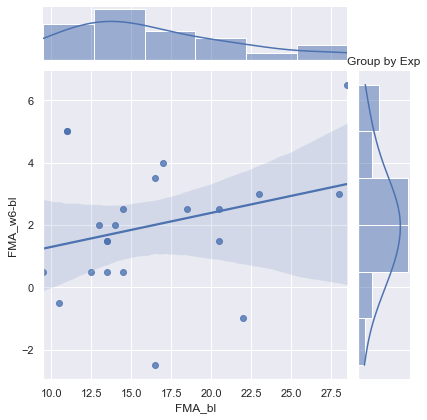

    FMA_bl  FMA_w6-bl
4     26.5        4.5
5     23.5        3.5
6     18.5        1.5
7     17.5       -1.5
10    12.0        2.0


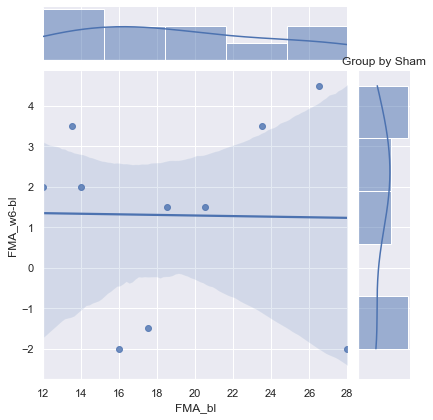

In [92]:
#WOLF
# Group by Exp Only
df_3D = df[(df['Group'] == '3D') | (df['Group'] == '2D') | (df['Group'] =='Reach')]
df_new = df_3D[['FMA_bl','FMA_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['FMA_bl'], df_new['FMA_w6-bl'], kind= 'reg')
plt.title('Group by Exp')
plt.show()

# Group by Sham Only
df_3D = df[(df['Group'] == '2D Sham') | (df['Group'] == '1D Sham ')]
df_new = df_3D[['FMA_bl','FMA_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['FMA_bl'], df_new['FMA_w6-bl'], kind= 'reg')
plt.title('Group by Sham')
plt.show()

       WOLF_bl  WOLF_w6-bl
12   97.127000  -15.319000
13   80.682350    0.086950
16   92.748200   -3.821500
22  112.391500  -19.132800
23   86.129667   11.020333


Text(0.5, 1.0, 'Group by 3D')

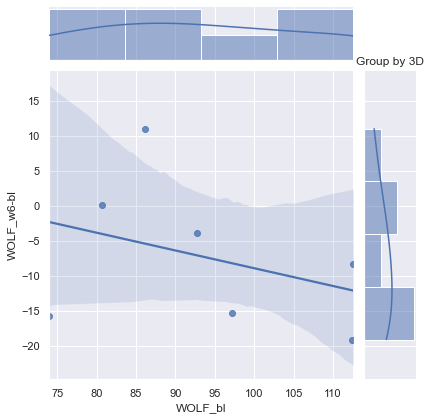

In [74]:
# Group by 3D
df_3D = df[df['Group'] == '3D']
df_new = df_3D[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')
plt.title('Group by 3D')

     WOLF_bl  WOLF_w6-bl
0   80.86967    -0.15567
1   80.33500    -0.00830
2   69.16500   -15.21833
3   88.55900     0.04233
8  112.13530    -7.40830


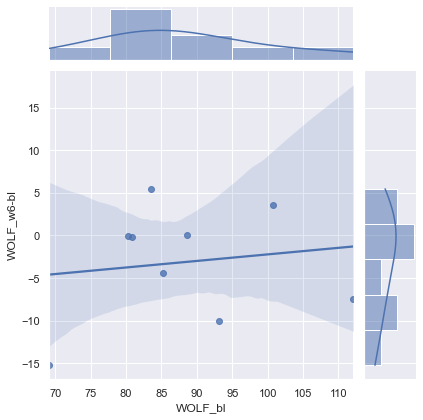

In [57]:
df_3D = df[df['Group'] == '2D']
df_new = df_3D[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')

       WOLF_bl  WOLF_w6-bl
15  101.845850  -11.243150
19   97.914667    6.349333
21   97.929667   -6.082367
24   67.262683   14.314017
28   96.647667    0.192333


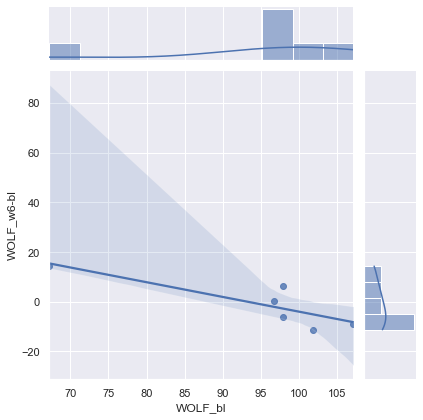

In [58]:
df_new_group = df[df['Group'] == 'Reach']
df_new = df_new_group[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')

       WOLF_bl  WOLF_w6-bl
4    80.539665  -13.918995
5    88.499000   -0.005670
6    80.618000   -8.048000
7    88.389667    7.877033
10  100.596850    3.760150


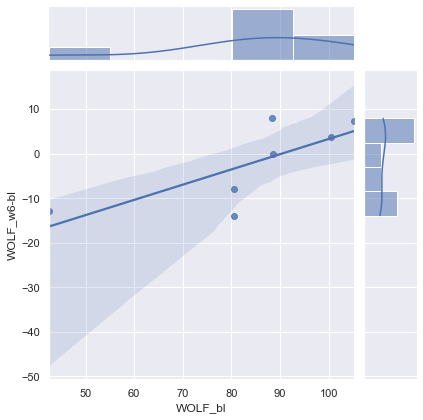

In [59]:
df_new_group = df[df['Group'] == '2D Sham']
df_new = df_new_group[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')

       WOLF_bl  WOLF_w6-bl
17   96.774650    0.492050
18  116.109333   -3.509333
26   85.477667    4.320333


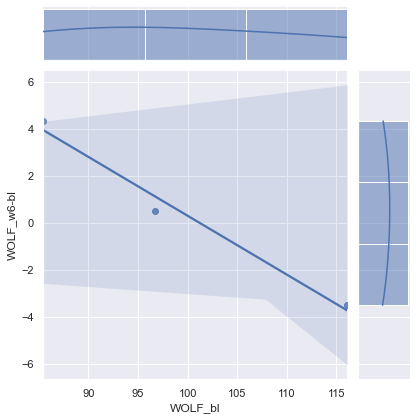

In [68]:
df_new_group= df[df['Group'] == '1D Sham '] #weird space in string
df_new = df_new_group[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')

       WOLF_bl  WOLF_w6-bl
4    80.539665  -13.918995
5    88.499000   -0.005670
6    80.618000   -8.048000
7    88.389667    7.877033
10  100.596850    3.760150


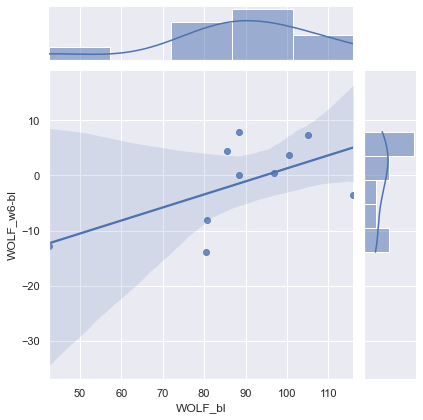

In [73]:
df_new_group= df[(df['Group'] == '1D Sham ') | (df['Group'] == '2D Sham')] #weird space in string
df_new = df_new_group[['WOLF_bl','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.jointplot(df_new['WOLF_bl'], df_new['WOLF_w6-bl'], kind= 'reg')

Male vs Female
M    20
F    12
Name: Gender, dtype: int64


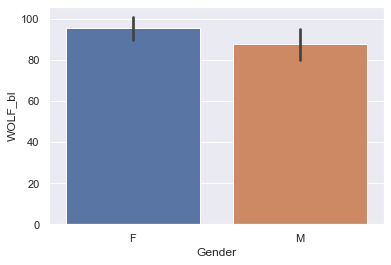

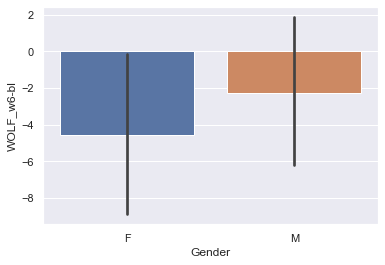

In [35]:
"""
    Does gender have an effect on their WOLF improvement
"""

print("Male vs Female")
print(df['Gender'].value_counts())

df_new = df[['Gender','WOLF_bl']]
# print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Gender'], df_new['WOLF_bl'])
plt.show()

df_new = df[['Gender','WOLF_w6-bl']]
# print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Gender'], df_new['WOLF_w6-bl'])
plt.show()

Male vs Female
M    20
F    12
Name: Gender, dtype: int64


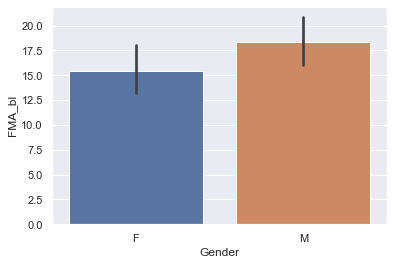

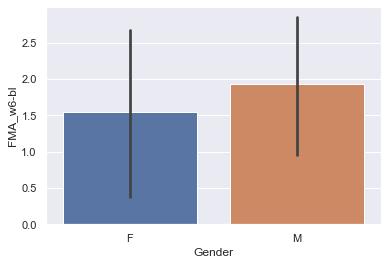

In [34]:
"""
    Does gender have an effect on their FMA improvement
"""

print("Male vs Female")
print(df['Gender'].value_counts())

df_new = df[['Gender','FMA_bl']]
# print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Gender'], df_new['FMA_bl'])
plt.show()

df_new = df[['Gender','FMA_w6-bl']]
# print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Gender'], df_new['FMA_w6-bl'])
plt.show()

L    16
R    11
Name: Stroke Side, dtype: int64

L vs R stroke
L    16
R    11
Name: Stroke Side, dtype: int64


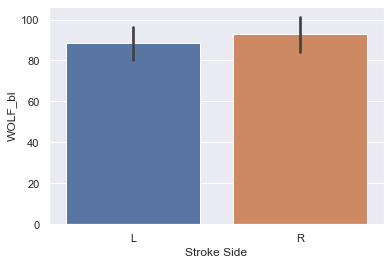

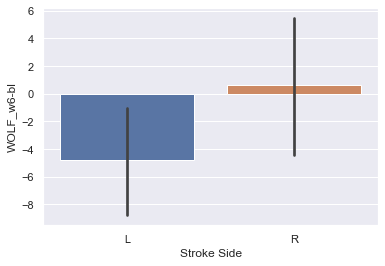

In [50]:
"""
    Does stroke side havee an effect in WOLF baseline
    
    Should consider same side vs opposite side????
    
    Ipselateral vs Contralateral???
    
"""

print("L vs R stroke")
print(df['Stroke Side'].value_counts())

df_new = df[['Stroke Side','WOLF_bl']]
# print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Stroke Side'], df_new['WOLF_bl'])
plt.show()

df_new = df[['Stroke Side','WOLF_w6-bl']]
# print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Stroke Side'], df_new['WOLF_w6-bl'])
plt.show()

In [ ]:
"""
    Do a L/R hand dominant vs Stroke Side vs Improvement???
"""

  Stroke Location    WOLF_bl
0             NaN  80.869670
1             NaN  80.335000
2               3  69.165000
3             1,3  88.559000
4             1,3  80.539665


<AxesSubplot:xlabel='Stroke Location', ylabel='WOLF_bl'>

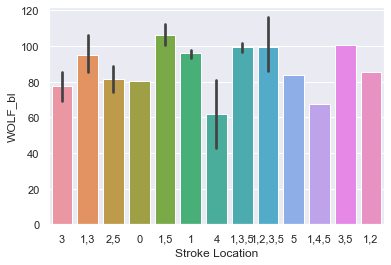

In [13]:
df_new = df[['Stroke Location','WOLF_bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Stroke Location'], df_new['WOLF_bl'])

  Stroke Location  WOLF_w6-bl
0             NaN   -0.155670
1             NaN   -0.008300
2               3  -15.218330
3             1,3    0.042330
4             1,3  -13.918995


<AxesSubplot:xlabel='Stroke Location', ylabel='WOLF_w6-bl'>

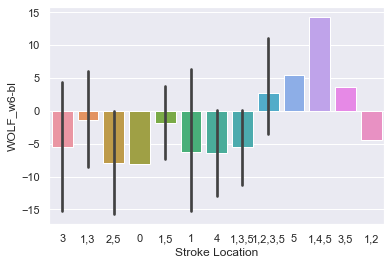

In [93]:
df_new = df[['Stroke Location','WOLF_w6-bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Stroke Location'], df_new['WOLF_w6-bl'])

  Gender    WOLF_bl
0      F  80.869670
1      M  80.335000
2      M  69.165000
3      M  88.559000
4      F  80.539665


<AxesSubplot:xlabel='Gender', ylabel='WOLF_bl'>

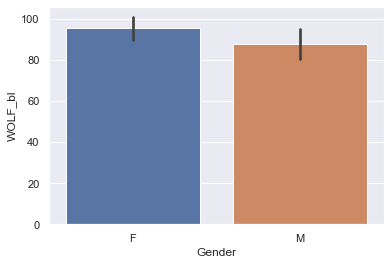

  Gender  WOLF_w6-bl
0      F   -0.155670
1      M   -0.008300
2      M  -15.218330
3      M    0.042330
4      F  -13.918995


<AxesSubplot:xlabel='Gender', ylabel='WOLF_w6-bl'>

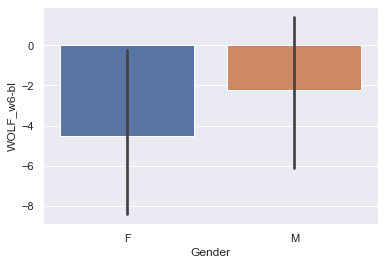

  Gender  FMA_bl
0      F    16.5
1      M    23.0
2      M    28.5
3      M    22.0
4      F    26.5


<AxesSubplot:xlabel='Gender', ylabel='FMA_bl'>

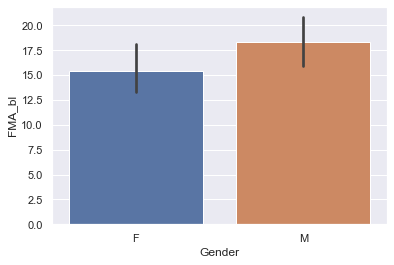

In [184]:
df_new = df[['Gender','FMA_bl']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Gender'], df_new['FMA_bl'])

In [ ]:
df_new = df[['Gender','FMA_bl-w6']]
print(df_new.head())
sns.set_theme(style="darkgrid")
sns.barplot(df_new['Gender'], df_new['FMA_bl=w6'])

In [33]:
df.groupby('Gender').mean()

,Age,WOLF_bl,WOLF_w6,WOLF_w10,FMA_bl,FMA_w6,FMA_w10,WOLF_bl-w6
Gender,,,,,,,,
F,62.0,95.345038,90.802456,87.593944,15.458333,17.00,17.041667,4.542582
M,57.4,87.940670,85.692272,80.663740,18.325000,20.25,19.600000,2.248398


In [34]:
df.groupby('Race').mean()

,Age,WOLF_bl,WOLF_w6,WOLF_w10,FMA_bl,FMA_w6,FMA_w10,WOLF_bl-w6
Race,,,,,,,,
Asian,64.000000,95.545444,94.233110,91.572557,17.666667,17.666667,18.000000,1.312334
Black/African American,59.538462,89.108702,83.708242,79.092538,17.884615,20.230769,19.076923,5.400461
White,57.875000,91.119024,89.535527,85.092592,16.656250,18.312500,18.406250,1.583497


In [35]:
df.groupby('Stroke Side').mean()

,Age,WOLF_bl,WOLF_w6,WOLF_w10,FMA_bl,FMA_w6,FMA_w10,WOLF_bl-w6
Stroke Side,,,,,,,,
L,60.937500,88.695416,83.881258,80.002390,18.093750,19.625000,19.125000,4.814158
R,55.727273,92.686651,93.300125,87.307694,16.272727,18.454545,17.590909,-0.613473


In [36]:
df.groupby('Stroke Location').mean()

,Age,WOLF_bl,WOLF_w6,WOLF_w10,FMA_bl,FMA_w6,FMA_w10,WOLF_bl-w6
Stroke Location,,,,,,,,
0,63.000000,80.618000,72.570000,72.574000,18.500000,20.000000,18.000000,8.048000
1,76.000000,96.080989,89.752900,88.760233,13.666667,15.333333,12.333333,6.328089
3,57.000000,77.321333,71.872335,59.761335,24.500000,28.500000,21.500000,5.448998
4,40.500000,61.620675,55.219650,53.416300,19.500000,21.000000,21.500000,6.401025
5,57.000000,83.583667,89.050000,81.159300,20.500000,23.000000,23.000000,-5.466333
"1,2",41.000000,85.202000,80.778700,73.067300,13.500000,15.000000,16.000000,4.423300
"1,2,3,5",48.666667,99.671217,102.338900,101.043567,14.333333,15.000000,15.166667,-2.667683
"1,3",62.000000,95.048300,93.630540,90.544600,18.000000,19.000000,20.600000,1.417760
"1,3,5",53.000000,99.246758,93.721350,96.658000,13.500000,14.500000,14.500000,5.525408


In [38]:
df_age = df.groupby('Age').mean()
df_age

,WOLF_bl,WOLF_w6,WOLF_w10,FMA_bl,FMA_w6,FMA_w10,WOLF_bl-w6
Age,,,,,,,
21,80.682350,80.769300,66.373300,11.00,16.0,16.0,-0.086950
37,95.172425,89.548015,94.560682,18.50,21.0,20.5,5.624410
41,100.655667,96.689350,94.683650,13.75,15.5,17.0,3.966317
45,80.539665,66.620670,57.889330,26.50,31.0,32.0,13.918995
48,80.335000,80.326700,80.339300,23.00,26.0,27.0,0.008300
50,88.389667,96.266700,88.432000,17.50,16.0,19.0,-7.877033
51,92.748200,88.926700,80.679300,18.50,21.0,22.0,3.821500
52,96.774650,97.266700,97.030700,16.00,14.0,15.5,-0.492050
53,86.129667,97.150000,89.800000,13.00,15.0,12.0,-11.020333


<AxesSubplot:xlabel='Age', ylabel='WOLF_bl-w6'>

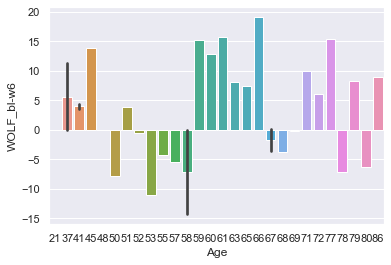

In [174]:
sns.barplot(data = df, x = "Age" , y="WOLF_bl-w6")

<AxesSubplot:xlabel='Race', ylabel='WOLF_bl-w6'>

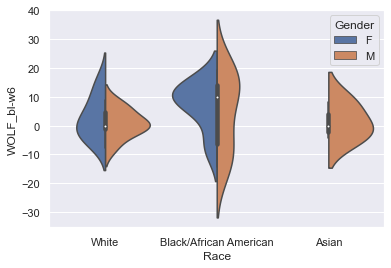

In [172]:
sns.violinplot(data=df, x='Race',y='WOLF_bl-w6',hue='Gender', split=True)

<AxesSubplot:xlabel='Race', ylabel='FMA_bl-w6'>

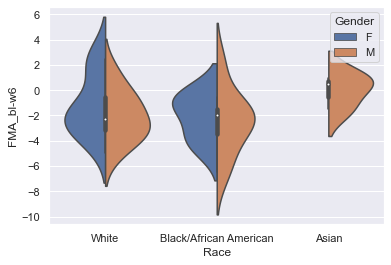

In [175]:
sns.violinplot(data=df, x='Race',y='FMA_bl-w6',hue='Gender', split=True)

In [ ]:
"""
    Does the muscle they have coactivation have to do with their stroke location?
"""

In [ ]:
"""
    Does the muscle they trained on has correlation to improvement?
"""